In [29]:
import pandas as pd

#monday = pd.read_csv('monday.csv')
tuesday = pd.read_csv('/home/buli/Documents/Spiced/convex_capers_student_code/data/marketplace/tuesday.csv',sep = ';')
#wednesday = pd.read_csv('wednesday.csv',sep=';')
#thursday = pd.read_csv('thursday.csv')
#friday= pd.read_csv('friday.csv')

In [30]:
tuesday.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [31]:
tuesday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4714 non-null   object
 1   customer_no  4714 non-null   int64 
 2   location     4714 non-null   object
dtypes: int64(1), object(2)
memory usage: 110.6+ KB


In [32]:
tuesday['timestamp'] = pd.to_datetime(tuesday['timestamp'], infer_datetime_format=True)

In [33]:
tuesday.describe()

,customer_no
count,4714.000000
mean,706.052397
std,414.187438
min,1.000000
25%,338.250000
50%,710.000000
75%,1067.750000
max,1422.000000


In [34]:
#Number of customers per section
tuesday.groupby('location').count()

,timestamp,customer_no
location,,
checkout,1420,1420
dairy,911,911
drinks,713,713
fruit,976,976
spices,694,694


In [35]:
#Number of customers per section over time

import seaborn as sns

#gb_1 = pd.DataFrame(wednesday.groupby(['location','timestamp']).count())

sns.lineplot(data=gb_1, x='timestamp', y='customer_no',hue='location')




NameError: name 'gb_1' is not defined

In [ ]:
#Number of customers at checkout over time

In [ ]:
#time each customer spent in the market

In [ ]:
#Total number of customers over time 

<AxesSubplot:xlabel='timestamp'>

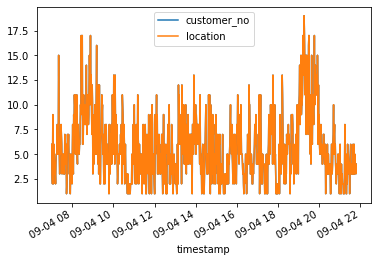

In [ ]:
#wednesday.groupby('timestamp').count().plot()

In [ ]:
### Calculate the time each customer spent in the market
## Time of entrance
## Time of Checkout 
## Diference 

tuesday[tuesday['customer_no'] == 2]


,timestamp,customer_no,location
1,2019-09-03 07:02:00,2,drinks
34,2019-09-03 07:14:00,2,fruit
61,2019-09-03 07:17:00,2,checkout


In [ ]:
min_gb = tuesday.groupby('customer_no').min()
min_gb[min_gb['location'] != 'checkout']


,timestamp,location
customer_no,,
1411,2019-09-03 21:29:00,dairy
1422,2019-09-03 21:46:00,dairy


In [ ]:
min_gb = tuesday.groupby(['customer_no','location']).min()

In [ ]:
max_gb = tuesday.groupby('customer_no').max()
max_gb[max_gb['location'] != 'checkout']

,timestamp,location
customer_no,,
1,2019-09-03 07:12:00,fruit
2,2019-09-03 07:17:00,fruit
3,2019-09-03 07:10:00,dairy
4,2019-09-03 07:12:00,spices
5,2019-09-03 07:09:00,dairy
...,...,...
1418,2019-09-03 21:43:00,drinks
1419,2019-09-03 21:43:00,fruit
1420,2019-09-03 21:46:00,drinks


In [ ]:
df = min_gb.merge(max_gb,how='left', on='customer_no')
#df['duration'] = timestamp_y - timestamp_x
df.head()

,timestamp_x,timestamp_y,location
customer_no,,,
1,2019-09-03 07:12:00,2019-09-03 07:12:00,fruit
1,2019-09-03 07:05:00,2019-09-03 07:12:00,fruit
1,2019-09-03 07:02:00,2019-09-03 07:12:00,fruit
2,2019-09-03 07:17:00,2019-09-03 07:17:00,fruit
2,2019-09-03 07:02:00,2019-09-03 07:17:00,fruit


In [ ]:
#df['duration'] = df['timestamp_y'] - df['timestamp_x']
df.dtypes

timestamp_x    object
timestamp_y    object
location       object
dtype: object

In [ ]:
s1 = pd.Series(df['duration'])
s1

customer_no
1      0 days 00:10:00
2      0 days 00:15:00
3      0 days 00:07:00
4      0 days 00:06:00
5      0 days 00:03:00
             ...      
1418   0 days 00:06:00
1419   0 days 00:01:00
1420   0 days 00:03:00
1421   0 days 00:02:00
1422   0 days 00:01:00
Name: duration, Length: 1422, dtype: timedelta64[ns]

In [ ]:
df['duration_min'] = df['duration'].dt.components['minutes']
df.head()

,timestamp_x,location_x,timestamp_y,location_y,duration,duration_min
customer_no,,,,,,
1,2019-09-03 07:02:00,checkout,2019-09-03 07:12:00,fruit,0 days 00:10:00,10
2,2019-09-03 07:02:00,checkout,2019-09-03 07:17:00,fruit,0 days 00:15:00,15
3,2019-09-03 07:03:00,checkout,2019-09-03 07:10:00,dairy,0 days 00:07:00,7
4,2019-09-03 07:06:00,checkout,2019-09-03 07:12:00,spices,0 days 00:06:00,6
5,2019-09-03 07:06:00,checkout,2019-09-03 07:09:00,dairy,0 days 00:03:00,3


In [ ]:
df.describe()

,duration,duration_min
count,1422,1422.000000
mean,0 days 00:06:07.130801687,6.118847
std,0 days 00:05:39.683271018,5.661388
min,0 days 00:01:00,1.000000
25%,0 days 00:02:00,2.000000
50%,0 days 00:04:00,4.000000
75%,0 days 00:08:00,8.000000
max,0 days 00:37:00,37.000000


In [ ]:
### Calculate the total of customers in the supermarket over time 
tuesday['hour'] = tuesday['timestamp'].dt.hour
tuesday[tuesday['hour']==7]

,timestamp,customer_no,location,hour
0,2019-09-03 07:02:00,1,fruit,7
1,2019-09-03 07:02:00,2,drinks,7
2,2019-09-03 07:03:00,3,dairy,7
3,2019-09-03 07:05:00,1,drinks,7
4,2019-09-03 07:06:00,4,dairy,7
...,...,...,...,...
323,2019-09-03 07:59:00,88,dairy,7
324,2019-09-03 07:59:00,96,spices,7
325,2019-09-03 07:59:00,102,checkout,7
326,2019-09-03 07:59:00,103,dairy,7


In [ ]:
tuesday['customer_no'].groupby(tuesday['hour']).count()

hour
7     328
8     463
9     262
10    267
11    133
12    199
13    330
14    343
15    223
16    405
17    366
18    444
19    437
20    320
21    194
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='Count'>

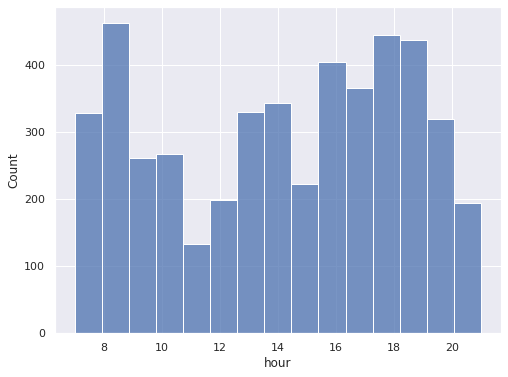

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
sns.histplot(data=tuesday, x='hour')

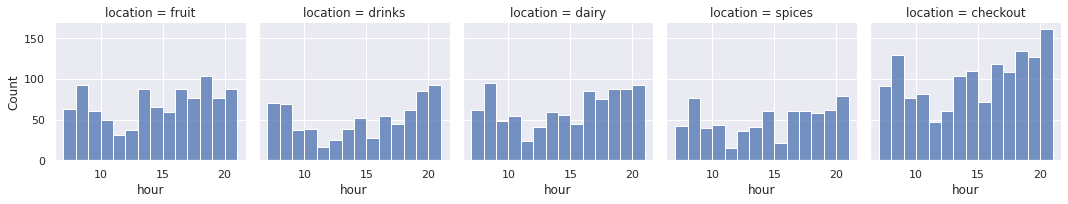

In [ ]:
sns.set_theme(style="darkgrid")

sns.displot(
    tuesday, x="hour",col='location', col_wrap=5,
    binwidth=1, height= 3, facet_kws=dict(margin_titles=True))

In [ ]:
#Calculate the total number of customers in each section over time

tuesday.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [ ]:
tuesday['customer_no'].groupby(tuesday['timestamp']).count()

timestamp
2019-09-03 07:02:00    2
2019-09-03 07:03:00    1
2019-09-03 07:05:00    1
2019-09-03 07:06:00    2
2019-09-03 07:07:00    3
                      ..
2019-09-03 21:46:00    4
2019-09-03 21:47:00    2
2019-09-03 21:48:00    1
2019-09-03 21:49:00    1
2019-09-03 21:50:00    1
Name: customer_no, Length: 861, dtype: int64

In [ ]:
#Display the number of customers at checkout over time

In [ ]:
## The checkout customers over time using time as index



In [ ]:
## Tuesday probability matrix  For 1 customer 

tuesday = tuesday.sort_values(by=['customer_no','timestamp'])
tuesday['first_location']= tuesday['location'].shift(periods=1)
tuesday['first_location']= tuesday['first_location'].fillna(0)
tuesday.head()


,timestamp,customer_no,location,hour,first_location
0,2019-09-03 07:02:00,1,fruit,7,0
3,2019-09-03 07:05:00,1,drinks,7,fruit
25,2019-09-03 07:12:00,1,checkout,7,drinks
1,2019-09-03 07:02:00,2,drinks,7,checkout
34,2019-09-03 07:14:00,2,fruit,7,drinks


In [ ]:
customer_1 = tuesday[tuesday['customer_no']== 1]
customer_2 = tuesday[tuesday['customer_no']== 2]
customer_3 = tuesday[tuesday['customer_no']== 3]

In [28]:
tprob = pd.crosstab(tuesday['location'], tuesday['first_location'], normalize=0)
tprob_c1 = pd.crosstab(customer_1['location'], customer_1['first_location'], normalize=0)
tprob_c2 = pd.crosstab(customer_2['location'], customer_2['first_location'], normalize=0)
tprob_c3 = pd.crosstab(customer_3['location'], customer_3['first_location'], normalize=0)

KeyError: 'first_location'

In [27]:
#tprob = tprob.drop([0], axis=1)
tprob

NameError: name 'tprob' is not defined

<AxesSubplot:xlabel='first_location', ylabel='location'>

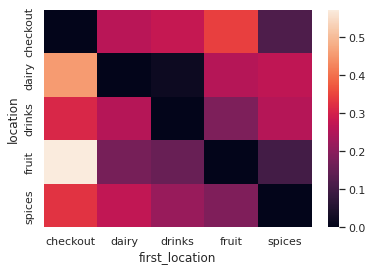

In [ ]:
sns.heatmap(data=tprob)

In [36]:
tuesday = tuesday.sort_values(by=['customer_no','timestamp'])
#tuesday = tuesday.drop(['second_location'], axis=1)
tuesday.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
3,2019-09-03 07:05:00,1,drinks
25,2019-09-03 07:12:00,1,checkout
1,2019-09-03 07:02:00,2,drinks
34,2019-09-03 07:14:00,2,fruit


In [38]:
#tuesday['second_location'] = first_location
#tuesday['second_location'] = tuesday['second_location'].fillna(0)
#tuesday= tuesday.drop(['second_location'], axis=1)
tuesday.head()


,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
3,2019-09-03 07:05:00,1,drinks
25,2019-09-03 07:12:00,1,checkout
1,2019-09-03 07:02:00,2,drinks
34,2019-09-03 07:14:00,2,fruit


In [45]:
cust_time = tuesday.groupby('customer_no')

first_location = []

for customer, df_locations in cust_time:
    
    x = list(df_locations['location'].shift(1))
   
    first_location += x
    
print(len(first_location))

4714


In [46]:
tuesday['first_location'] = first_location
tuesday['first_location'] = tuesday['first_location'].fillna(0)
tuesday.head(10)

,timestamp,customer_no,location,first_location
0,2019-09-03 07:02:00,1,fruit,0
3,2019-09-03 07:05:00,1,drinks,fruit
25,2019-09-03 07:12:00,1,checkout,drinks
1,2019-09-03 07:02:00,2,drinks,0
34,2019-09-03 07:14:00,2,fruit,drinks
61,2019-09-03 07:17:00,2,checkout,fruit
2,2019-09-03 07:03:00,3,dairy,0
13,2019-09-03 07:10:00,3,checkout,dairy
4,2019-09-03 07:06:00,4,dairy,0
9,2019-09-03 07:08:00,4,spices,dairy


In [114]:
### Markov Simulation 3 customers no classes
ctest = tuesday[tuesday['customer_no'] <= 200]
ctest.tail()

,timestamp,customer_no,location,first_location
727,2019-09-03 08:50:00,200,spices,drinks
740,2019-09-03 08:52:00,200,drinks,spices
751,2019-09-03 08:54:00,200,fruit,drinks
780,2019-09-03 08:58:00,200,spices,fruit
791,2019-09-03 09:00:00,200,checkout,spices


In [115]:
tprob_test = pd.crosstab(ctest['first_location'], ctest['location'], normalize=0)
tprob_test

location,checkout,dairy,drinks,fruit,spices
first_location,,,,,
0,0.000000,0.280000,0.195000,0.350000,0.175000
dairy,0.366906,0.000000,0.244604,0.208633,0.179856
drinks,0.520325,0.024390,0.000000,0.276423,0.178862
fruit,0.443662,0.281690,0.133803,0.000000,0.140845
spices,0.215686,0.392157,0.303922,0.088235,0.000000


In [116]:
tprob_test = tprob_test.drop([0],axis=0)
tprob_test

location,checkout,dairy,drinks,fruit,spices
first_location,,,,,
dairy,0.366906,0.000000,0.244604,0.208633,0.179856
drinks,0.520325,0.024390,0.000000,0.276423,0.178862
fruit,0.443662,0.281690,0.133803,0.000000,0.140845
spices,0.215686,0.392157,0.303922,0.088235,0.000000


In [117]:
tprob_test = tprob_test.transpose()
tprob_test

first_location,dairy,drinks,fruit,spices
location,,,,
checkout,0.366906,0.520325,0.443662,0.215686
dairy,0.000000,0.024390,0.281690,0.392157
drinks,0.244604,0.000000,0.133803,0.303922
fruit,0.208633,0.276423,0.000000,0.088235
spices,0.179856,0.178862,0.140845,0.000000


In [199]:
TProb = tprob_test.to_dict(orient='list')


In [119]:
import random

States = tprob_test.index

def mc_simulation(i,TProb):
    history = [i]
        
    while history[-1] != 'checkout':
             
        probs = TProb[history[-1]]
        print(probs)
        next_state = random.choices(States,probs)[0]
        print(next_state)
        history.append(next_state)

    return history
               
 

In [120]:
mc_simulation('drinks',TProb)


[0.5203252032520326, 0.024390243902439025, 0.0, 0.2764227642276423, 0.17886178861788618]
checkout


['drinks', 'checkout']

In [121]:
TProb

{'dairy': [0.3669064748201439,
  0.0,
  0.2446043165467626,
  0.20863309352517986,
  0.17985611510791366],
 'drinks': [0.5203252032520326,
  0.024390243902439025,
  0.0,
  0.2764227642276423,
  0.17886178861788618],
 'fruit': [0.44366197183098594,
  0.28169014084507044,
  0.13380281690140844,
  0.0,
  0.14084507042253522],
 'spices': [0.21568627450980393,
  0.39215686274509803,
  0.30392156862745096,
  0.08823529411764706,
  0.0]}

In [122]:
ctest.dtypes

timestamp         datetime64[ns]
customer_no                int64
location                  object
first_location            object
dtype: object

In [123]:
#datetime_object = dt.strptime('2019-09-03 07:00:00', '%Y %b %d  %I:%M%p')
date_time_str = '3/09/19 07:00:00'
opening = dt.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
print ("The type of the date is now",  type(opening))
print ("The date is", opening)

The type of the date is now <class 'datetime.datetime'>
The date is 2019-09-03 07:00:00


In [133]:
ctest['min_counter'] = ctest['timestamp'] - opening

ctest.tail()


<ipython-input-133-6c8a3109b77d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctest['min_counter'] = ctest['timestamp'] - opening


,timestamp,customer_no,location,first_location,min_counter
727,2019-09-03 08:50:00,200,spices,drinks,0 days 01:50:00
740,2019-09-03 08:52:00,200,drinks,spices,0 days 01:52:00
751,2019-09-03 08:54:00,200,fruit,drinks,0 days 01:54:00
780,2019-09-03 08:58:00,200,spices,fruit,0 days 01:58:00
791,2019-09-03 09:00:00,200,checkout,spices,0 days 02:00:00


In [170]:
dtest = ctest
dtest['minutes'] = dtest['min_counter'].dt.components['minutes'] + dtest['min_counter'].dt.components['hours']*60
dtest.loc[dtest['minutes']==70]

<ipython-input-170-3dccd4cad1c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest['minutes'] = dtest['min_counter'].dt.components['minutes'] + dtest['min_counter'].dt.components['hours']*60


,timestamp,customer_no,location,first_location,min_counter,minutes
416,2019-09-03 08:10:00,110,spices,fruit,0 days 01:10:00,70
417,2019-09-03 08:10:00,113,fruit,drinks,0 days 01:10:00,70
418,2019-09-03 08:10:00,126,spices,dairy,0 days 01:10:00,70
419,2019-09-03 08:10:00,128,dairy,fruit,0 days 01:10:00,70
420,2019-09-03 08:10:00,130,checkout,fruit,0 days 01:10:00,70
421,2019-09-03 08:10:00,131,fruit,0,0 days 01:10:00,70


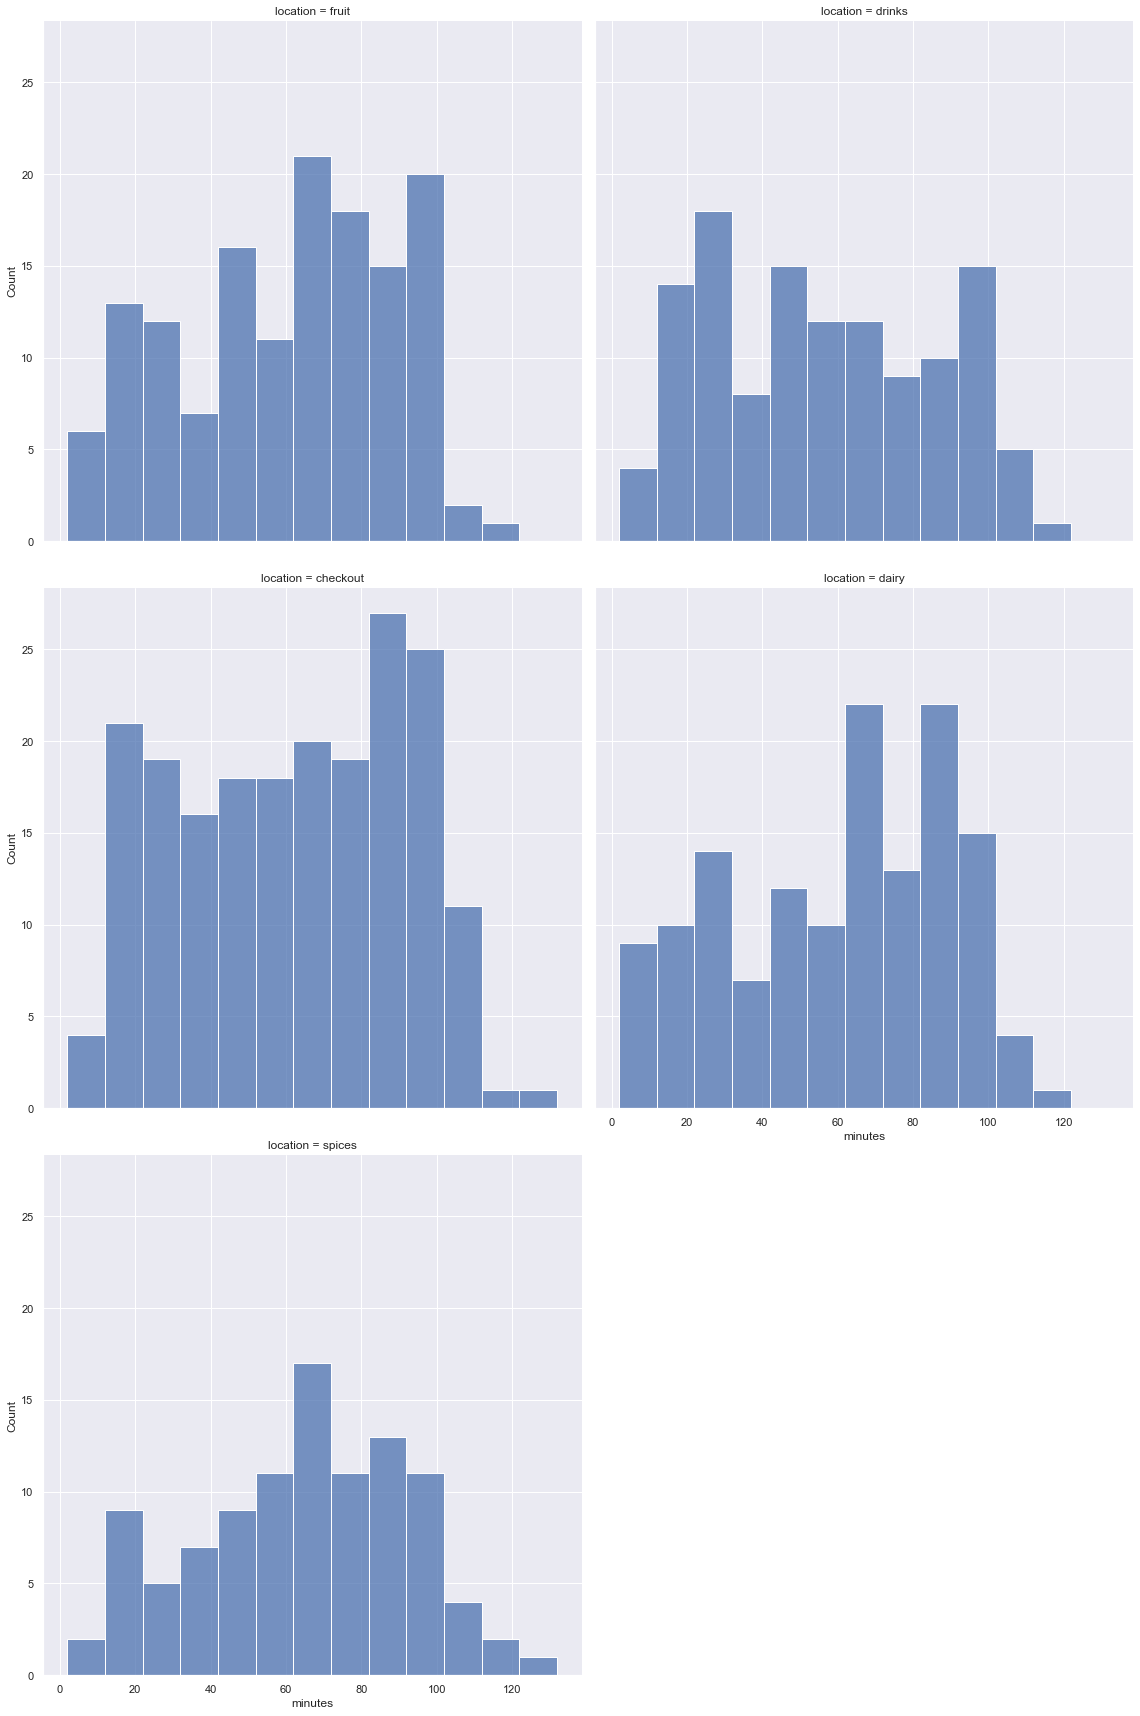

In [140]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.displot(
    ctest, x="minutes",col='location', col_wrap=2,
    binwidth=10, height= 8, facet_kws=dict(margin_titles=True))

a- function that will 
        1. takes begin timestamp 
        2. slice the df by 10 minutes
        3. caculate prob
        4. return prob. table
b - feed the prob. into mc_simulation
c - for loop until end of day
d - output: 
        1. 10 min timestamp
        2. count of customers in each location
        3. locations list for each customer


In [198]:
#chose time of day (10 min interval)
#subtract 7 am from time of day, then convert to minute count
#chose from dtest time of day until timeof day +10 min
#for this df perform the prob table

time_of_day = '08:10'


In [230]:
dtest.dtypes

timestamp          datetime64[ns]
customer_no                 int64
location                   object
first_location             object
min_counter       timedelta64[ns]
minutes                     int64
dtype: object

In [239]:
tuesday

,timestamp,customer_no,location,first_location
0,2019-09-03 07:02:00,1,fruit,0
3,2019-09-03 07:05:00,1,drinks,fruit
25,2019-09-03 07:12:00,1,checkout,drinks
1,2019-09-03 07:02:00,2,drinks,0
34,2019-09-03 07:14:00,2,fruit,drinks
...,...,...,...,...
4707,2019-09-03 21:46:00,1421,fruit,0
4709,2019-09-03 21:47:00,1421,drinks,fruit
4711,2019-09-03 21:48:00,1421,checkout,drinks
4708,2019-09-03 21:46:00,1422,spices,0


In [232]:
init_time = 0

def select_time_window_along_day(init_time):
    end_time_window = init_time +9
    x =dtest.loc[dtest['minutes'].between(init_time,end_time_window)]

    return x

In [223]:
# def select_time_window_with_choice(hr_min_str):
#     conversion_var = '3/09/19 ' +hr_min_str +':00'

#     start_time = dt.strptime(conversion_var,'%d/%m/%y %H:%M:%S')    #transition
#     start_min = (start_time - opening)          #timedelta
#     minutes = int(start_min.seconds/60)      
#     end_time_window = minutes +9
#     x =dtest.loc[dtest['minutes'].between(minutes,end_time_window)]

#     return x

In [233]:
select_time_window_along_day(init_time)

,timestamp,customer_no,location,first_location,min_counter,minutes
0,2019-09-03 07:02:00,1,fruit,0,0 days 00:02:00,2
3,2019-09-03 07:05:00,1,drinks,fruit,0 days 00:05:00,5
1,2019-09-03 07:02:00,2,drinks,0,0 days 00:02:00,2
2,2019-09-03 07:03:00,3,dairy,0,0 days 00:03:00,3
4,2019-09-03 07:06:00,4,dairy,0,0 days 00:06:00,6
9,2019-09-03 07:08:00,4,spices,dairy,0 days 00:08:00,8
11,2019-09-03 07:09:00,4,drinks,spices,0 days 00:09:00,9
5,2019-09-03 07:06:00,5,dairy,0,0 days 00:06:00,6
12,2019-09-03 07:09:00,5,checkout,dairy,0 days 00:09:00,9
6,2019-09-03 07:07:00,6,dairy,0,0 days 00:07:00,7


In [205]:

def generate_prob_matrix(df):
    prob_m_create = pd.crosstab(df['first_location'], df['location'], normalize=0)
    prob_m_create = prob_m_create.drop([0],axis=0)
    prob_matrix = prob_m_create.transpose()
    prob_dict = prob_matrix.to_dict(orient='list')
    
    
    return prob_matrix, prob_dict

#printouts
#print('first p','\n',prob_m_create)
#print('sec p','\n',prob_m_create)
#    print('='*40)
#print('trd p','\n',prob_m_create)
#print(prob_m)

In [234]:
prob_m , prob_d = generate_prob_matrix(x)
prob_m, prob_d

(first_location     dairy    drinks     fruit    spices
 location                                              
 checkout        0.285714  0.500000  0.470588  0.333333
 dairy           0.000000  0.000000  0.235294  0.444444
 drinks          0.214286  0.000000  0.058824  0.111111
 fruit           0.357143  0.333333  0.000000  0.111111
 spices          0.142857  0.166667  0.235294  0.000000,
 {'dairy': [0.2857142857142857,
   0.0,
   0.21428571428571427,
   0.35714285714285715,
   0.14285714285714285],
  'drinks': [0.5, 0.0, 0.0, 0.3333333333333333, 0.16666666666666666],
  'fruit': [0.47058823529411764,
   0.23529411764705882,
   0.058823529411764705,
   0.0,
   0.23529411764705882],
  'spices': [0.3333333333333333,
   0.4444444444444444,
   0.1111111111111111,
   0.1111111111111111,
   0.0]})

In [235]:
import random



def mc_simulation(i,prob_matrix,prob_dict):
    States = prob_matrix.index
    history = [i]
        
    while history[-1] != 'checkout':
             
        probs = prob_dict[history[-1]]
        #print(probs)
        next_state = random.choices(States,probs)[0]
        #print(next_state)
        history.append(next_state)

    return history

In [238]:
customer_sim = mc_simulation('dairy',prob_m,prob_d)
customer_sim

['dairy', 'drinks', 'fruit', 'spices', 'dairy', 'fruit', 'checkout']

In [ ]:
for time_window_10_min in range (720): 
    init_time = 0

    #functions: 1. create time window df 2. generate matrix 3. perform simulation

    init_time += 10